# Tutorial 3
# Parameter estimation from the weight of Honey-bee hives (Reproducibility of Table 2)
Here we will reproduce the results presented in Table 2 based on the step by step notebook at tutorial 1.
- The function 'Model_Estimation_2('Name.csv', $t_0$,$t_1$,$\color{blue}{Nmax}$) imports the data set from a 'csv' file and allows us to fix the $\color{blue}{Nmax}$ value instead of $d$. 
- The $t_0$ and $t_1$ used in the following examples were calculated by performing multiple minimizations for different combinations of  $t_0$ and $t_1$, the optimal combination was used in the following examples.
  ## Packages needed: 

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import time
import sympy as sp 
from numpy import genfromtxt
#from itertools import cycle
from numpy import random
from scipy import optimize
from numpy import vectorize
from scipy.optimize import fsolve
from scipy.integrate import quad
from collections import defaultdict
#from cycler import cycler
from tabulate import tabulate
import scipy.optimize
from sklearn.linear_model import LinearRegression 
from src.source_codes import* 

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│      5220 │ 16912.7 │    4.768 │     1.339 │    0.845 │  0.007 │    9.763 │     163.244 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


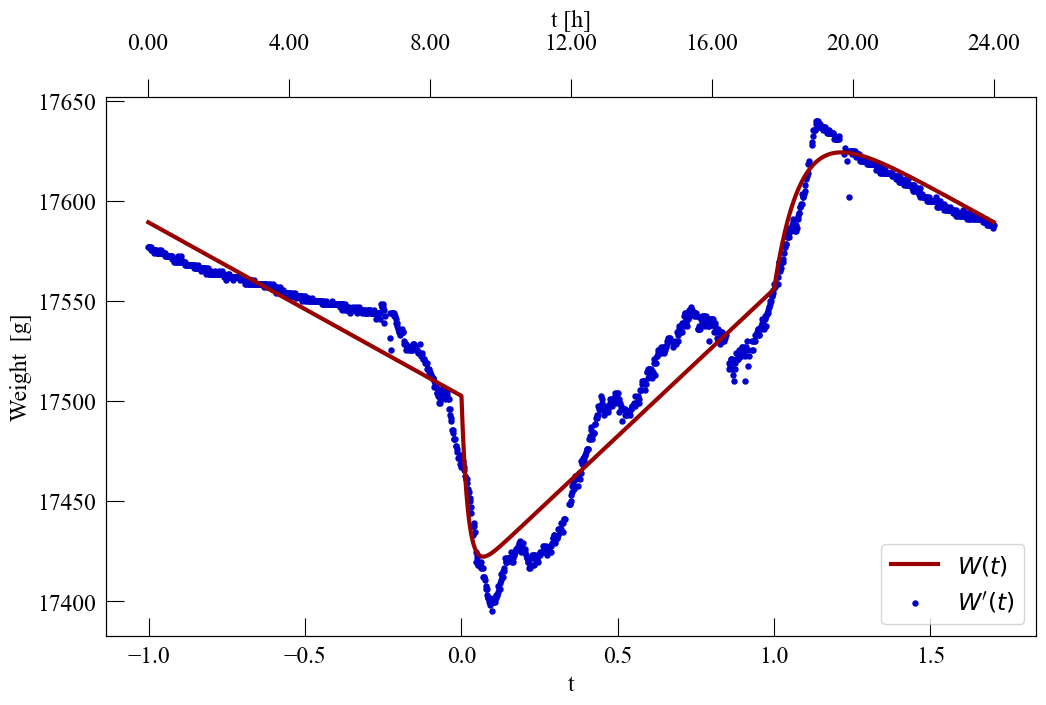

In [13]:
H_1=Model_Estimation_2('data/Hive_1.csv',8.9,17.77,5220)
Hive_1={}
Hive_1["a1"]=H_1[0][2]
Hive_1["a2"]=H_1[0][3]
Hive_1["d"]= H_1[0][4]
Hive_1["m"]= H_1[0][5]
Hive_1["l"]= H_1[0][6]
Hive_1["N"]= H_1[0][0]
Hive_1["W0"]=H_1[0][1]

In [14]:
Hive_1

{'a1': 4.768,
 'a2': 1.339,
 'd': 0.845,
 'm': 0.007,
 'l': 9.763,
 'N': 5220.0,
 'W0': 16912.702}

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│      7930 │ 22481.2 │    0.904 │     1.017 │    0.846 │  0.038 │   40.805 │     599.885 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


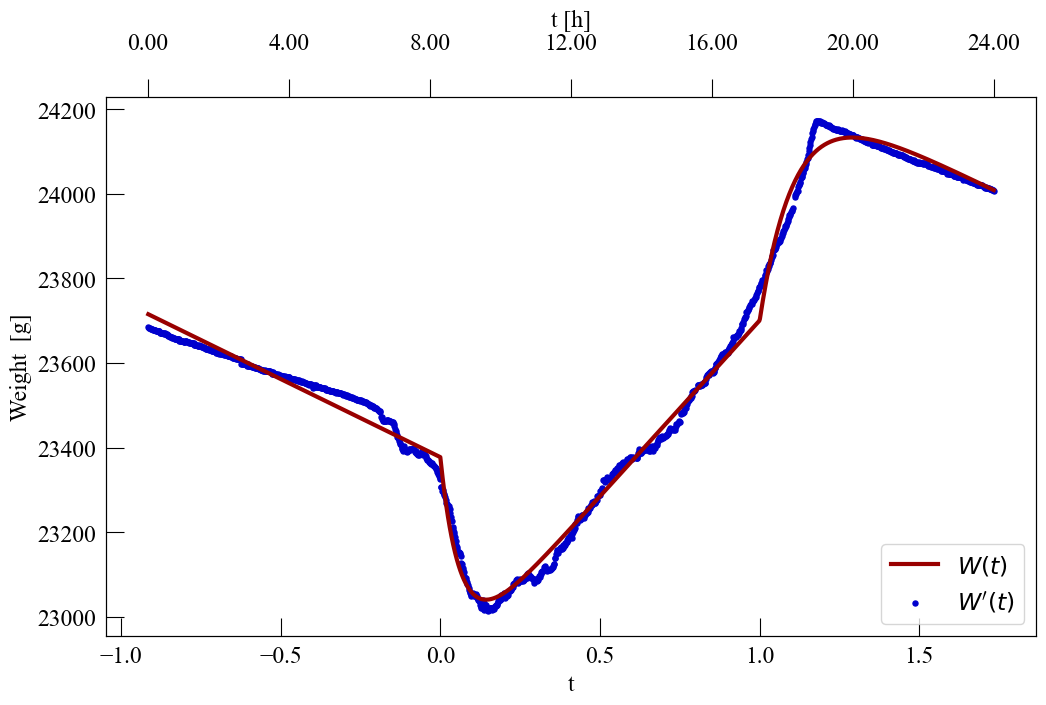

In [15]:
H_2=Model_Estimation_2('data/Hive_2.csv',8.3,17.36,7930.0)

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│      3330 │ 26426.5 │     0.77 │      2.47 │    0.846 │   0.04 │   16.628 │     348.408 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


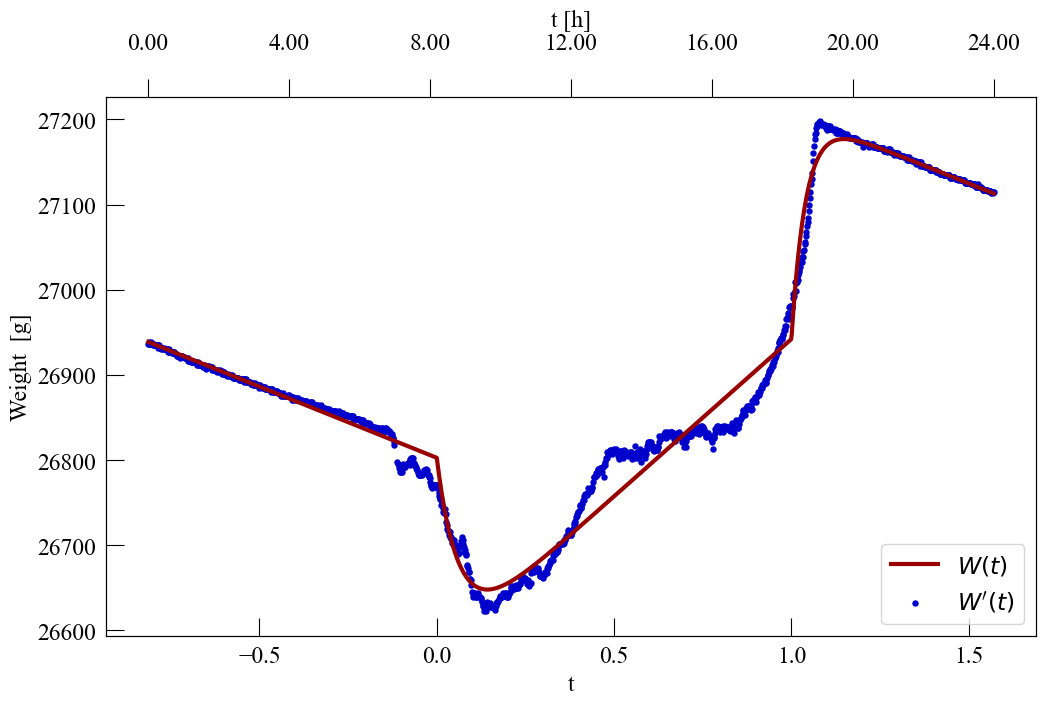

In [16]:
H_4=Model_Estimation_2('data/Hive_4.csv',8.2,18.26,3330)

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│      7400 │   22570 │    0.829 │     1.065 │    0.845 │  0.033 │   33.183 │     508.269 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


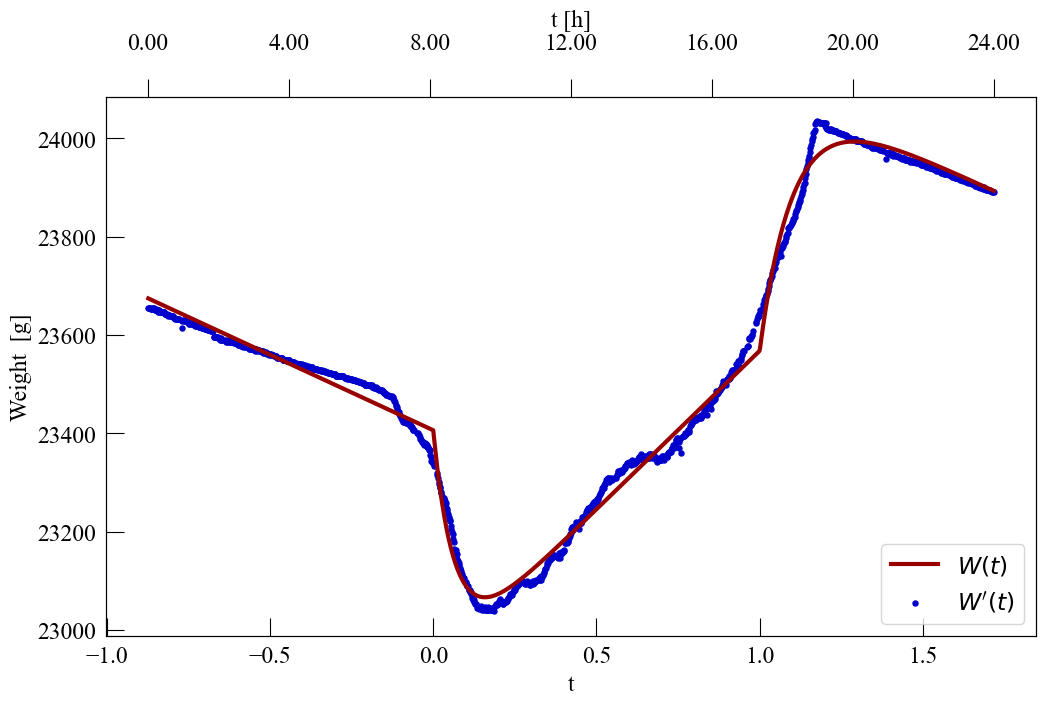

In [17]:
H_5=Model_Estimation_2('data/Hive_5.csv',8.1,17.36,7400)

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│      5830 │ 24067.8 │    0.989 │     2.106 │    0.846 │  0.029 │   20.663 │         430 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


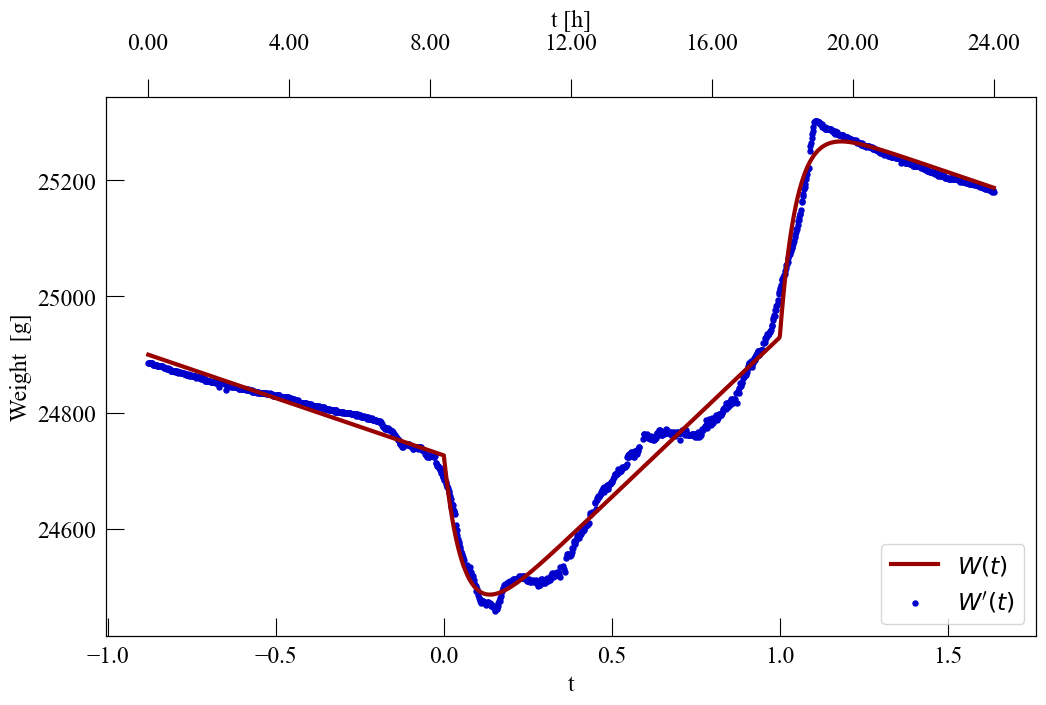

In [18]:
H_6=Model_Estimation_2('data/Hive_6.csv',8.4,17.93,5830.0)

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│      3540 │ 20840.1 │    0.497 │     2.003 │    0.846 │  0.033 │   15.016 │     321.248 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


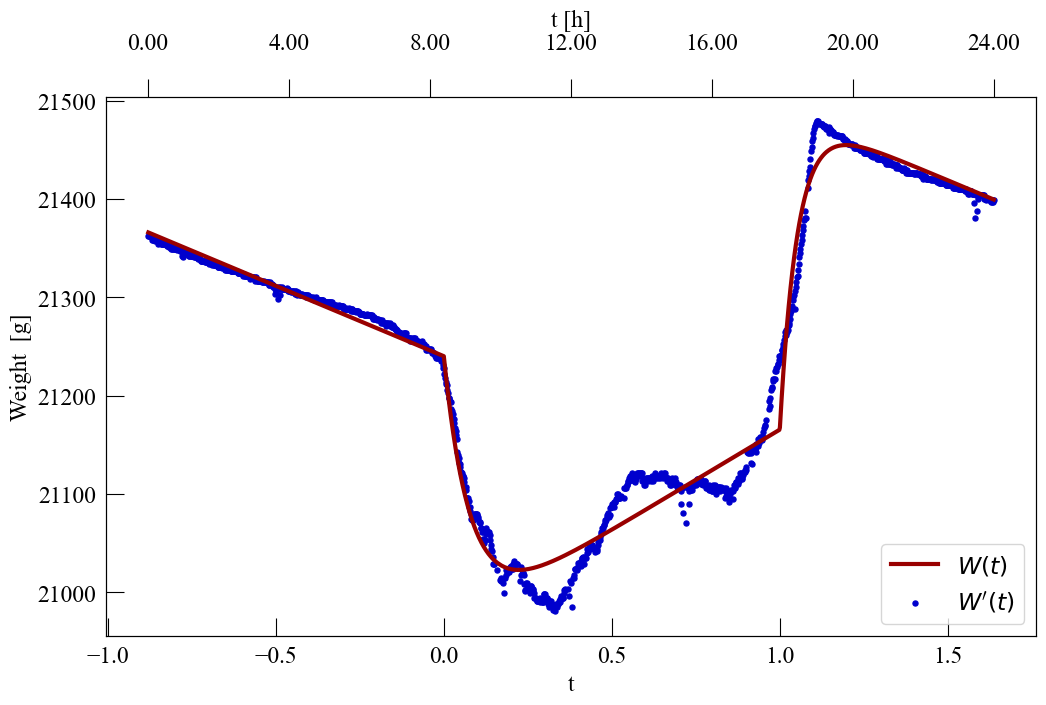

In [19]:
H_7=Model_Estimation_2('data/Hive_7.csv',8.4,17.93,3540.0)

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│       970 │ 17946.3 │    0.105 │     1.556 │    0.852 │  0.053 │    3.974 │      78.424 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


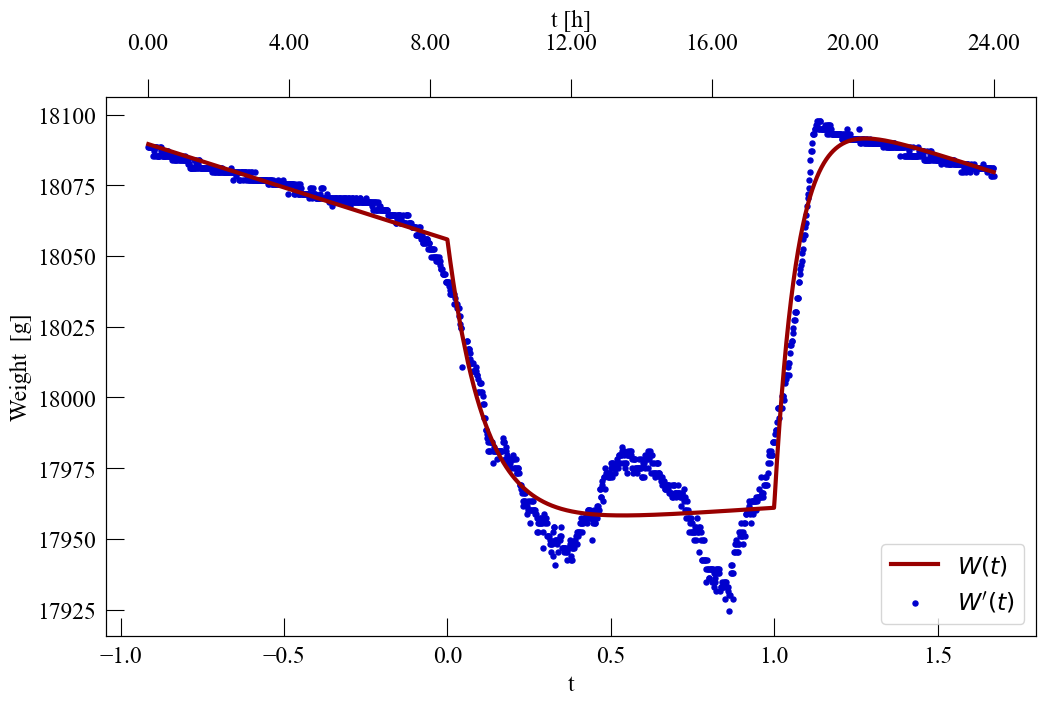

In [20]:
H_8=Model_Estimation_2('data/Hive_8.csv',8.5,17.77,970.0)

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│      1260 │ 19338.9 │    0.436 │     1.843 │    0.847 │  0.077 │    7.687 │     121.867 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


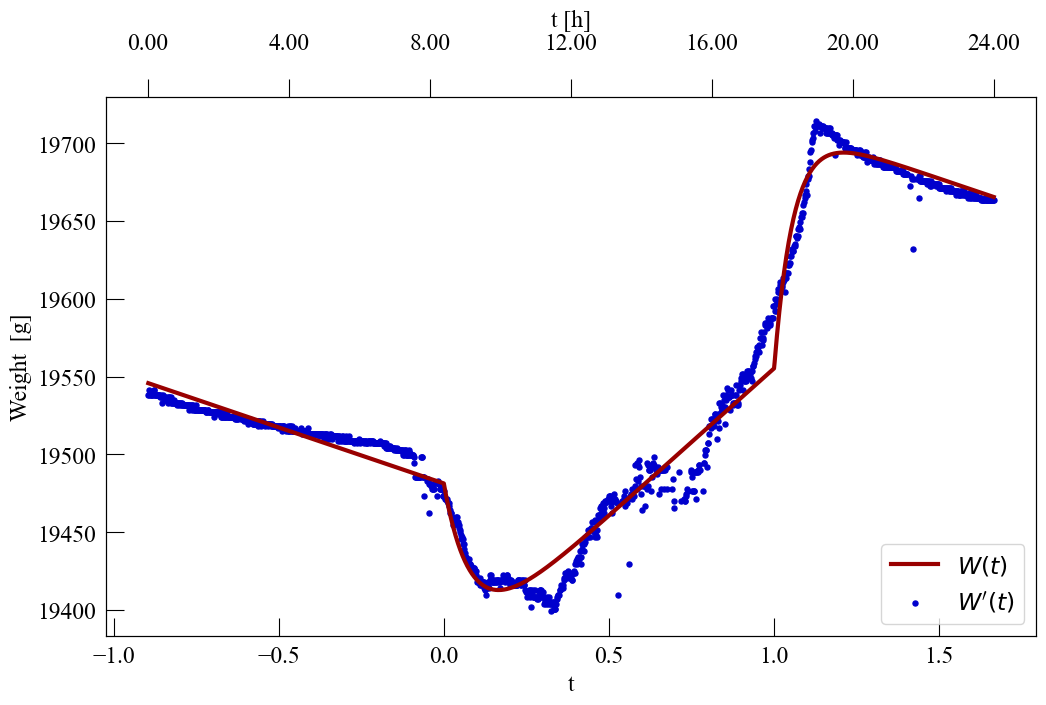

In [21]:
H_9=Model_Estimation_2('data/Hive_9.csv',8.4,17.77,1260)

╒═══════════╤═════════╤══════════╤═══════════╤══════════╤════════╤══════════╤═════════════╕
│   N[bees] │   W0[g] │   a[1/h] │   a2[1/h] │   d[1/h] │   m[g] │   l[g/h] │   Error$^2$ │
╞═══════════╪═════════╪══════════╪═══════════╪══════════╪════════╪══════════╪═════════════╡
│       910 │   19260 │    0.238 │      2.35 │     0.85 │  0.041 │    4.399 │       46.45 │
╘═══════════╧═════════╧══════════╧═══════════╧══════════╧════════╧══════════╧═════════════╛


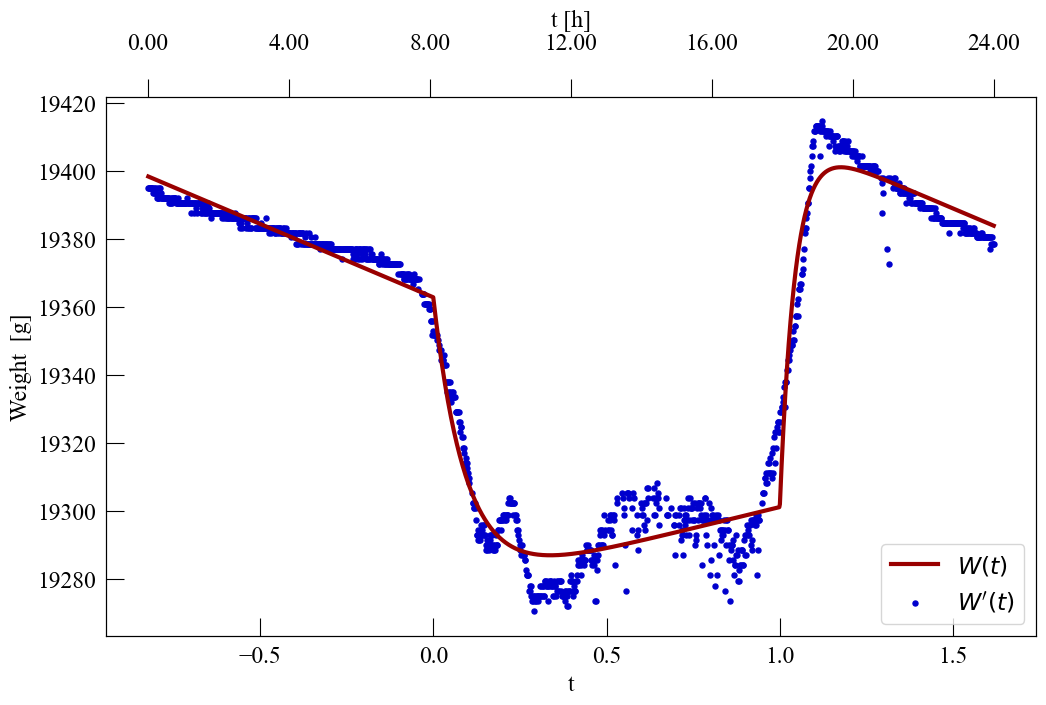

In [22]:
H_10=Model_Estimation_2('data/Hive_10.csv',8.1,17.93,910)